# 4- Estadística descriptiva & As-Is de los datos

# 1 Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2 Lectura de mi base de datos

In [4]:
## hacer un grafico de la cantidad de llamadas por dia
# hacer un radar plot para medir el nivel de satisfaccion vs tiempo de espera y resolución hay uno en el notebook del matplotlib
# hay que tener en cuenta los tipos de graficos esta pagina es para ver que grafico usar https://www.data-to-viz.com/
# hay que ver y entender los graficios los analisis univariantes, analisis bivariantes de 2 a 4 variables cuantitativas
# en seaborn tengo para hacer analisis univariante 
# Comentar el tipo de columnas y si son variables qualitativas, cuantitativas, ect
# analizar la cardinalidad de los datos qualitativos de menos del 10 % con motivo de estudio
# definir que tipo de variables es cada columna
# ver y cambiar el tipo de type de cada columna
# ver si es viable un mapa de correlacion boston_df.corr() tengo que excluir los tipo object
# plt.figure(figsize=(12,9))
# sns.heatmap(boston_df.corr(),
#           vmin=-1,vmax=1,annot=True,linewidths=0.5); 1 y menos 1 muy correlacionados, 0 nada correlacionados
# ver que tipo de limitarion of correlarion pearson spearman y comentarlo
# con el cmap le cambio los colores
# correlograma no estoy seguro si aplica ver pero en ultima instancia
# croos tan son como pivot table pero mas simple y luego puedo hacer graficos de eso ver seaborn catplot
# Trimap
# el codigo de entrega tiene que ser en un unico notebook 
# para mi columna avg tengo que hacer df.describe(include='object')
# si completo un na tengo que justificar por que lo reemplazo y por que lo hago con el valor determinado
# importar todas las librerias de visualización y graficos
# para hacer los meses, las columnas puedo hacer df.loc['2016':'2018'] asi para poner entre 2 fechas
# ver si se puede hacer un split en las columnas time para quedarme sin la fecha 
## goog.plot para fechas 
# .dttime o split par QUEDARME SOLO CON LA HORA (no fundiono en la primera me genera int y en la segunda me genera object)

In [21]:
Telecom_N = pd.read_csv(r'C:\Users\Lucia\Desktop\bootcamp\Proyecto_EDA_Pablo_Mendez\telecom_N.csv',
                      parse_dates=['DATE'])

In [8]:
Telecom = pd.read_csv(r'C:\Users\Lucia\Desktop\bootcamp\Proyecto_EDA_Pablo_Mendez\telecom_Y.csv',
                      parse_dates=['DATE'])
Telecom.info()  
# Corroboramos que al guardarse nuevamente en un CSV las columnas tipo Deltatime vuelve a ser Object con lo cual debemos  transformarlas.                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CALL ID                     4054 non-null   object        
 1   AGENT                       4054 non-null   object        
 2   DATE                        4054 non-null   datetime64[ns]
 3   DAY_OF_THE_WEEK             4054 non-null   object        
 4   TIME                        4054 non-null   object        
 5   TOPIC                       4054 non-null   object        
 6   ANSWERED (Y/N)              4054 non-null   object        
 7   RESOLVED                    4054 non-null   object        
 8   SPEED OF ANSWER IN SECONDS  4054 non-null   float64       
 9   AVGTALKDURATION             4054 non-null   object        
 10  SATISFACTION RATING         4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage

In [24]:
Telecom['TIME'] = pd.to_timedelta(Telecom['TIME'])
Telecom['AVGTALKDURATION'] = pd.to_timedelta(Telecom['AVGTALKDURATION'])
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   CALL ID                     4054 non-null   object         
 1   AGENT                       4054 non-null   object         
 2   DATE                        4054 non-null   datetime64[ns] 
 3   DAY_OF_THE_WEEK             4054 non-null   object         
 4   TIME                        4054 non-null   timedelta64[ns]
 5   TOPIC                       4054 non-null   object         
 6   ANSWERED (Y/N)              4054 non-null   object         
 7   RESOLVED                    4054 non-null   object         
 8   SPEED OF ANSWER IN SECONDS  4054 non-null   float64        
 9   AVGTALKDURATION             4054 non-null   timedelta64[ns]
 10  SATISFACTION RATING         4054 non-null   float64        
dtypes: datetime64[ns](1), float64(2), object(6)

# 3 Detalle & Entendimiento de las columnas


In [19]:
Telecom.head(0)

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING




| Columnas                  | Descripción                                                 |
|:---------------------------:|-------------------------------------------------------------|
| *1*                         | **CALL ID** - *ID único de las llamadas*                           |
| *2*                         | **AGENT** - *Nombre del agente que participa en la interacción*  |
| *3*                         | **DATE** - *Fecha de la interacción con el cliente*               |
| *4*                         | **DAY_OF_THE_WEEK** - *Día de la semana de la interacción*        |
| *5*                         | **TIME** - *Hora de inicio de la interacción*                      |
| *6*                         | **TOPIC** - *Motivo principal de la interacción*                  |
| *7*                         | **ANSWERED(Y/N)** - *Indica si la llamada se concreta o no*       |
| *8*                         | **RESOLVED** - *Indica si la gestión/consulta fue resuelta*        |
| *9*                         | **SPEED OF ANSWER IN SECONDS** - *Tiempo de demora del cliente*    |
| *10*                        | **AVGTALKDURATION** - *Duración de la interacción*                |
| *11*                        | **SATISFACTION RATING** - *CSAT (Customer Satisfaction)*          |

# 4 Analisis preliminar 

In [20]:
Telecom

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
0,ID0033,Diane,2021-01-01,Friday,0 days 13:33:36,Technical Support,Y,Y,57.0,0 days 00:06:49,3.0
1,ID0056,Dan,2021-01-01,Friday,0 days 17:44:10,Streaming,Y,Y,83.0,0 days 00:06:45,4.0
2,ID0039,Stewart,2021-01-01,Friday,0 days 14:38:24,Contract related,Y,Y,74.0,0 days 00:06:41,1.0
3,ID0009,Greg,2021-01-01,Friday,0 days 11:13:55,Admin Support,Y,Y,15.0,0 days 00:06:38,4.0
4,ID0043,Diane,2021-01-01,Friday,0 days 14:47:02,Technical Support,Y,Y,45.0,0 days 00:06:21,3.0
...,...,...,...,...,...,...,...,...,...,...,...
4049,ID4987,Stewart,2021-03-31,Wednesday,0 days 13:01:55,Payment related,Y,N,10.0,0 days 00:02:26,4.0
4050,ID4986,Diane,2021-03-31,Wednesday,0 days 12:50:24,Streaming,Y,N,55.0,0 days 00:02:01,1.0
4051,ID4998,Diane,2021-03-31,Wednesday,0 days 16:53:46,Payment related,Y,Y,84.0,0 days 00:01:49,4.0
4052,ID4999,Jim,2021-03-31,Wednesday,0 days 17:02:24,Streaming,Y,Y,98.0,0 days 00:00:58,5.0


#### *Disponemos de 5000 datos sin nulos con un total de 11 columnas*
#### *4054 interacciones concretadas*
#### *946 interacciones no concretadas*

In [22]:
Telecom.describe()

,DATE,TIME,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
count,4054,4054,4054.000000,4054,4054.000000
mean,2021-02-13 01:23:28.386778624,0 days 13:32:07.630488406,67.520720,0 days 00:03:44.922792303,3.403552
min,2021-01-01 00:00:00,0 days 09:00:00,10.000000,0 days 00:00:30,1.000000
25%,2021-01-23 00:00:00,0 days 11:18:14,39.000000,0 days 00:02:10,3.000000
50%,2021-02-13 00:00:00,0 days 13:30:43,68.000000,0 days 00:03:46,3.000000
75%,2021-03-06 00:00:00,0 days 15:48:58,97.000000,0 days 00:05:19,4.000000
max,2021-03-31 00:00:00,0 days 18:00:00,125.000000,0 days 00:07:00,5.000000
std,NaN,0 days 02:37:25.513444935,33.592872,0 days 00:01:51.381554518,1.212220


#### Podemos inferir que hay atencion de lunes a domindo de 9 a 18 horas

In [45]:
Telecom['DAY_OF_THE_WEEK'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [30]:
Telecom_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   CALL ID                     946 non-null    object         
 1   AGENT                       946 non-null    object         
 2   DATE                        946 non-null    datetime64[ns] 
 3   DAY_OF_THE_WEEK             946 non-null    object         
 4   TIME                        946 non-null    timedelta64[ns]
 5   TOPIC                       946 non-null    object         
 6   ANSWERED (Y/N)              946 non-null    object         
 7   RESOLVED                    946 non-null    object         
 8   SPEED OF ANSWER IN SECONDS  0 non-null      float64        
 9   AVGTALKDURATION             946 non-null    object         
 10  SATISFACTION RATING         0 non-null      float64        
dtypes: datetime64[ns](1), float64(2), object(7), 

In [31]:
Telecom_en_bruto = pd.read_csv(r'C:\Users\Lucia\Desktop\bootcamp\Proyecto_EDA_Pablo_Mendez\telecom.csv',
                      parse_dates=['DATE'])

In [37]:
Telecom_en_bruto['CALL ID'].count()

5000

#### En primer lugar analizamos el nivel de atencion actualmente el equipo atiende un 81,08% de las llamadas entrantes

In [42]:
Nivel_de_atencion = (Telecom_en_bruto['ANSWERED (Y/N)'].value_counts()/Telecom_en_bruto['CALL ID'].count())*100
print(Nivel_de_atencion)

ANSWERED (Y/N)
Y    81.08
N    18.92
Name: count, dtype: float64


In [47]:
Telecom.head(3)

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
0,ID0033,Diane,2021-01-01,Friday,0 days 13:33:36,Technical Support,Y,Y,57.0,0 days 00:06:49,3.0
1,ID0056,Dan,2021-01-01,Friday,0 days 17:44:10,Streaming,Y,Y,83.0,0 days 00:06:45,4.0
2,ID0039,Stewart,2021-01-01,Friday,0 days 14:38:24,Contract related,Y,Y,74.0,0 days 00:06:41,1.0


#### *Calculamos la moda, la media y la mediana de los datos disponibles en Telecom*

In [52]:
Media = Telecom['SPEED OF ANSWER IN SECONDS'].mean()
Mediana = Telecom['SPEED OF ANSWER IN SECONDS'].median()
Moda = Telecom['SPEED OF ANSWER IN SECONDS'].mode()

print("Moda en la veloricad de respuesta en segundo =", Moda)
print("Media en la veloricad de respuesta en segundo =", Media)
print("Mediana en la veloricad de respuesta en segundo =", Mediana)

Moda en la veloricad de respuesta en segundo = 0    53.0
Name: SPEED OF ANSWER IN SECONDS, dtype: float64
Media en la veloricad de respuesta en segundo = 67.52072027627035
Mediana en la veloricad de respuesta en segundo = 68.0


In [53]:
Media = Telecom['AVGTALKDURATION'].mean()
Mediana = Telecom['AVGTALKDURATION'].median()
Moda = Telecom['AVGTALKDURATION'].mode()

print("Moda en el tiempo promedio del llamado =", Moda)
print("Media en el tiempo promedio del llamado =", Media)
print("Mediana en el tiempo promedio del llamado =", Mediana)

Moda en el tiempo promedio del llamado = 0   0 days 00:04:43
Name: AVGTALKDURATION, dtype: timedelta64[ns]
Media en el tiempo promedio del llamado = 0 days 00:03:44.922792303
Mediana en el tiempo promedio del llamado = 0 days 00:03:46


In [54]:
Media = Telecom['SATISFACTION RATING'].mean()
Mediana = Telecom['SATISFACTION RATING'].median()
Moda = Telecom['SATISFACTION RATING'].mode()

print("Moda en el nivel de satisfacción =", Moda)
print("Media en el nivel de satisfacción =", Media)
print("Mediana en el nivel de satisfacción =", Mediana)

Moda en el nivel de satisfacción = 0    3.0
Name: SATISFACTION RATING, dtype: float64
Media en el nivel de satisfacción = 3.4035520473606313
Mediana en el nivel de satisfacción = 3.0


In [58]:
promedio_diario_Neto = Telecom.groupby('DATE').size().mean()
print(promedio_diario_Neto)

45.044444444444444


In [59]:
promedio_diario = Telecom_en_bruto.groupby('DATE').size().mean()
print(promedio_diario)

55.55555555555556


#### Se reciben en promedio 55.55 llamadas diarias de las cuales se atienden el el 81% aproximadamente (dato brindado en la linea de codigo nivel de atención)

In [63]:
llamados_por_mes = Telecom_en_bruto.groupby(Telecom_en_bruto['DATE'].dt.to_period('M')).size()
llamados_por_mes

DATE
2021-01    1772
2021-02    1616
2021-03    1612
Freq: M, dtype: int64

#### el volumen de llamados por mes es similar con una leve variación de mes a mes

#### Visualizamos el total de llamadas por agente, Falta hacer una comparativa con el nivel de satisfaccion del agente 

In [98]:
Telecom.groupby('AGENT').agg({'AGENT': 'count', 'SATISFACTION RATING': 'mean'})

,AGENT,SATISFACTION RATING
AGENT,,
Becky,517,3.371373
Dan,523,3.447419
Diane,501,3.405190
Greg,502,3.404382
Jim,536,3.393657
Joe,484,3.330579
Martha,514,3.470817
Stewart,477,3.400419


In [90]:
Telecom.groupby(['AGENT']).size().sort_values(ascending=False)

AGENT
Jim        536
Dan        523
Becky      517
Martha     514
Greg       502
Diane      501
Joe        484
Stewart    477
dtype: int64

In [86]:
Telecom.groupby(['AGENT', Telecom['DATE'].dt.to_period('M')]).size()

AGENT    DATE   
Becky    2021-01    177
         2021-02    170
         2021-03    170
Dan      2021-01    190
         2021-02    170
         2021-03    163
Diane    2021-01    185
         2021-02    157
         2021-03    159
Greg     2021-01    173
         2021-02    176
         2021-03    153
Jim      2021-01    187
         2021-02    172
         2021-03    177
Joe      2021-01    186
         2021-02    150
         2021-03    148
Martha   2021-01    171
         2021-02    168
         2021-03    175
Stewart  2021-01    186
         2021-02    135
         2021-03    156
dtype: int64

In [83]:
Telecom['AGENT'].nunique()

8

In [75]:
promedio_llamadas_por_agente = Telecom.groupby('AGENT').size().mean()
print(promedio_llamadas_por_agente,'atendias por agente en promedio')

506.75 atendias por agente en promedio


# HACER COLUMNA A COLUMNA Y CAMBIAR LOS TIPOS DE DATOS NUEVAMENTE 

In [43]:
Porcentaje = (((Telecom['TOPIC'].value_counts())/Telecom['CALL ID'].count())*100)
Porcentaje = Porcentaje.apply(lambda x: f"{x:.2f}%")
Porcentaje

TOPIC
Streaming            20.89%
Payment related      20.18%
Technical Support    19.86%
Admin Support        19.61%
Contract related     19.46%
Name: count, dtype: object

#### *Podriamos decir que existe una distrubución con tendencia uniforma dado que no existe un topico preponderante*

C:\Users\Lucia\AppData\Local\Temp\ipykernel_25328\1372254351.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Telecom['TOPIC'].value_counts().index, y=Telecom['TOPIC'].value_counts(), palette='viridis')


TypeError: text() missing 3 required positional arguments: 'x', 'y', and 's'

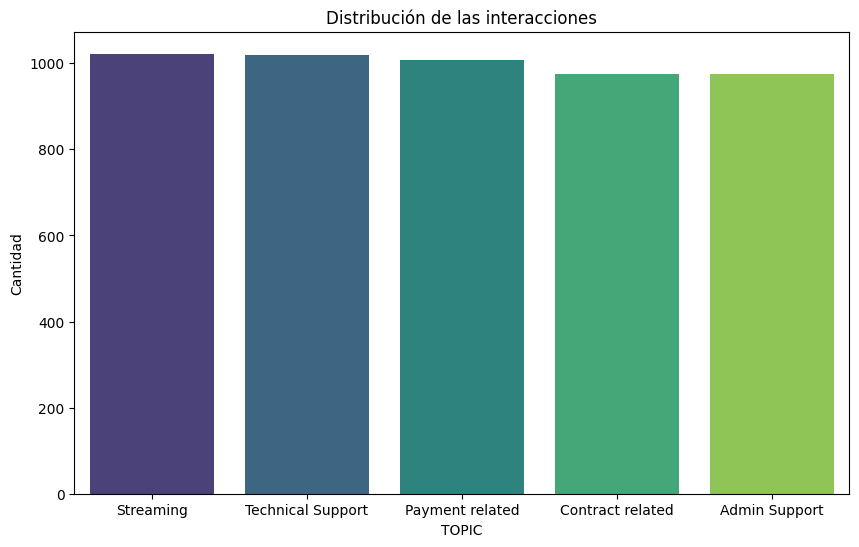

In [117]:
test = Telecom['TOPIC'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=Telecom['TOPIC'].value_counts().index, y=Telecom['TOPIC'].value_counts(), palette='viridis')


plt.xlabel('TOPIC')
plt.ylabel('Cantidad')
plt.title('Distribución de las interacciones')
plt.text()



plt.xticks(rotation=45, ha='right')


plt.show()

#### *En el grafico corroboramos que la distribución es bastante uniforme respecto del total de interacciones*

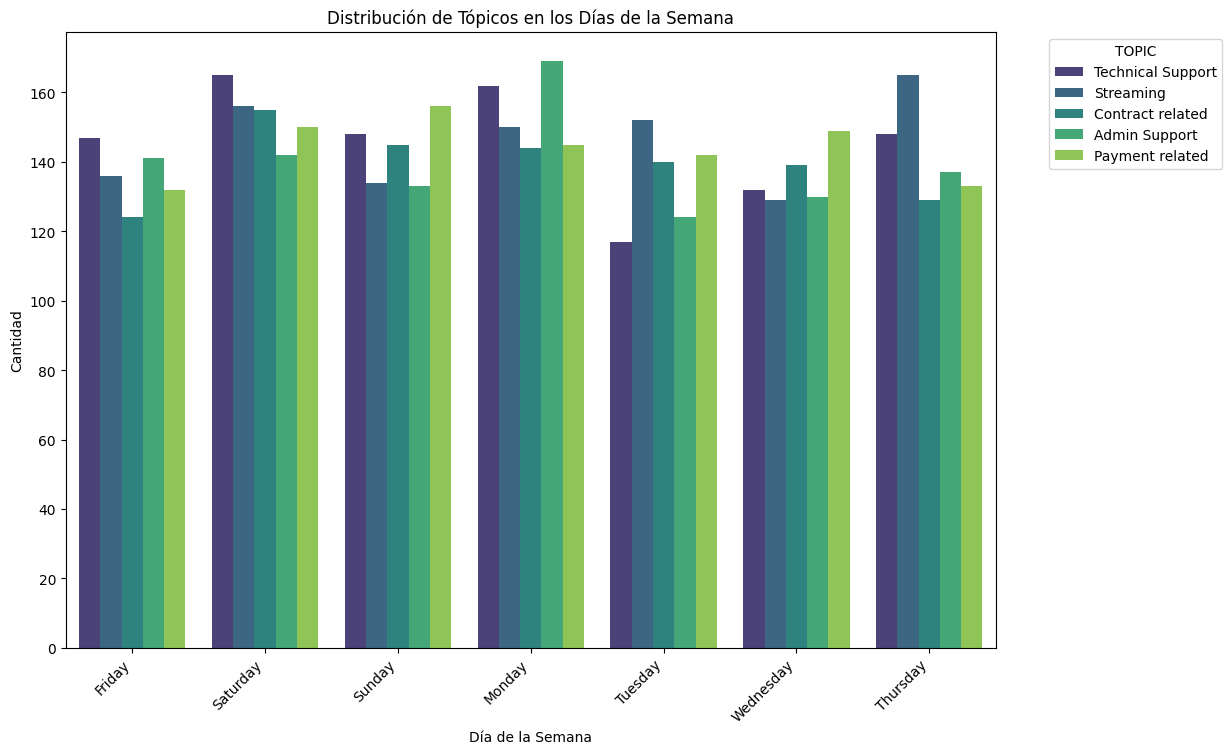

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x='DAY_OF_THE_WEEK', hue='TOPIC', data=Telecom, palette='viridis')

plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad')
plt.title('Distribución de Tópicos en los Días de la Semana')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TOPIC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [58]:
Telecom

,CALL ID,AGENT,DATE,DAY_OF_THE_WEEK,TIME,TOPIC,ANSWERED (Y/N),RESOLVED,SPEED OF ANSWER IN SECONDS,AVGTALKDURATION,SATISFACTION RATING
0,ID0033,Diane,2021-01-01,Friday,13:33:36,Technical Support,Y,Y,57.0,0 days 00:06:49,3.0
1,ID0056,Dan,2021-01-01,Friday,17:44:10,Streaming,Y,Y,83.0,0 days 00:06:45,4.0
2,ID0039,Stewart,2021-01-01,Friday,14:38:24,Contract related,Y,Y,74.0,0 days 00:06:41,1.0
3,ID0009,Greg,2021-01-01,Friday,11:13:55,Admin Support,Y,Y,15.0,0 days 00:06:38,4.0
4,ID0043,Diane,2021-01-01,Friday,14:47:02,Technical Support,Y,Y,45.0,0 days 00:06:21,3.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,ID4992,Joe,2021-03-31,Wednesday,14:13:55,Streaming,N,N,,0 days 00:00:00,
4996,ID4993,Joe,2021-03-31,Wednesday,14:18:14,Admin Support,N,N,,0 days 00:00:00,
4997,ID4994,Greg,2021-03-31,Wednesday,14:58:34,Contract related,N,N,,0 days 00:00:00,
4998,ID4995,Dan,2021-03-31,Wednesday,15:33:07,Payment related,N,N,,0 days 00:00:00,


In [97]:
pd.pivot_table(Telecom, values='CALL ID', index='AGENT', aggfunc='count', sort=True).sort_values(by='CALL ID')

,CALL ID
AGENT,
Stewart,582
Joe,593
Greg,624
Becky,631
Dan,633
Diane,633
Martha,638
Jim,666


In [90]:
distribucion_por_agente = pd.pivot_table(Telecom, values='CALL ID', index='AGENT',columns='DATE', aggfunc='count', fill_value=0)
distribucion_por_agente



DATE,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31
AGENT,,,,,,,,,,,,,,,,,,,,,
Becky,8,9,5,5,5,3,7,4,7,8,...,6,3,6,4,9,10,4,9,3,3
Dan,6,8,9,4,7,5,7,9,14,7,...,7,9,9,3,8,8,7,6,4,2
Diane,8,11,6,5,8,4,7,10,5,8,...,8,5,5,2,8,3,5,6,4,4
Greg,6,4,5,4,10,9,8,6,6,8,...,5,6,8,10,5,10,5,3,3,4
Jim,9,7,7,9,2,8,7,5,8,7,...,9,3,8,8,3,6,4,9,5,4
Joe,9,5,12,8,12,6,9,6,11,12,...,7,9,8,3,7,7,6,9,4,3
Martha,6,8,9,13,9,8,4,2,9,7,...,6,9,6,8,7,7,2,9,1,3
Stewart,6,8,5,6,3,15,5,6,8,7,...,6,2,4,8,7,7,5,9,1,4
